# Importing the required libraries

In [ ]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# load data


In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


# Understanding the data

In [4]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

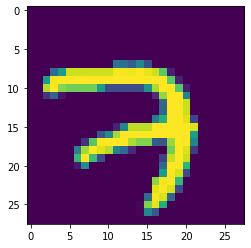

In [6]:
plt.imshow(x_train[5000])     #ploting the index=image


# Reshaping The Data

In [7]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# One Hot Encoding

In [8]:
number_of_classes = 10  #storing the no of classes in a variable

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [10]:
y_train[0] #Printing the new label

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Add CNN Layers


In [11]:
#create model
model=Sequential ()
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))


# Compiling The Model


In [12]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


# Train The Model

In [13]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 208s 110ms/step - loss: 0.2258 - accuracy: 0.9531 - val_loss: 0.0743 - val_accuracy: 0.9764
Epoch 2/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0742 - val_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0857 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 211s 112ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.1036 - val_accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0972 - val_accuracy: 0.9809


# Observing The Metrics


In [14]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09719487279653549, 0.98089998960495]


# Test The Model


In [15]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 1s 636ms/step
[[5.1234290e-12 2.9132625e-12 4.7156525e-11 1.9892369e-07 1.4272153e-02
  4.1180425e-05 6.8472568e-15 7.2068692e-04 6.3077291e-06 9.8495942e-01]]


In [17]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images
np.argmax(y_test[5000:5001]) #printing the actual labels

[9]


3

# Save The Model


In [18]:
# Save the model
model.save('models/project.h5')